# Project 2 Loan Prediction Dataset Playground
## Ryan Rosiak and Grant Dawson
## Due: 11/12/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from functions import plot_loan_amounts_vs_marital_status, plot_education_status_vs_credit_history, plot_applicant_income_vs_loan_amount_applied, plot_property_area_vs_loan_status, plot_loan_amount_vs_loan_amount_term, print_cross_val_score_with_fold, print_confusion_matrix_and_stats, plot_precision_recall_vs_threshold, compute_scores_and_plot_precision_recall_vs_threshold, plot_roc_curve, plot_roc_curve_and_print_roc_auc_score, print_accuracy_score, get_accuracy_score, get_threshold_list_and_corresponding_accuracy, plot_accuracy_vs_threshold,  compute_testtrain_split_accuracy, plot_testtrain_slit_vs_accuracy

In [2]:
lp_df = pd.read_csv('../Dataset/loan-train.csv', header=0)
lp_df['LoanAmount'] = lp_df['LoanAmount'] * 1000
# Replace the NAN values in each column
lp_df['Gender'] = lp_df['Gender'].fillna('Not Specified')
lp_df['Married'] = lp_df['Married'].fillna('Not Specified')
lp_df['Dependents'] = lp_df['Dependents'].fillna(0)
lp_df['Self_Employed'] = lp_df['Self_Employed'].fillna('No')
lp_df['LoanAmount'] = lp_df['LoanAmount'].fillna(0)
lp_df['Loan_Amount_Term'] = lp_df['Loan_Amount_Term'].fillna(0)
lp_df['Credit_History'] = lp_df['Credit_History'].fillna(0)

# Preliminary Analysis Graphs

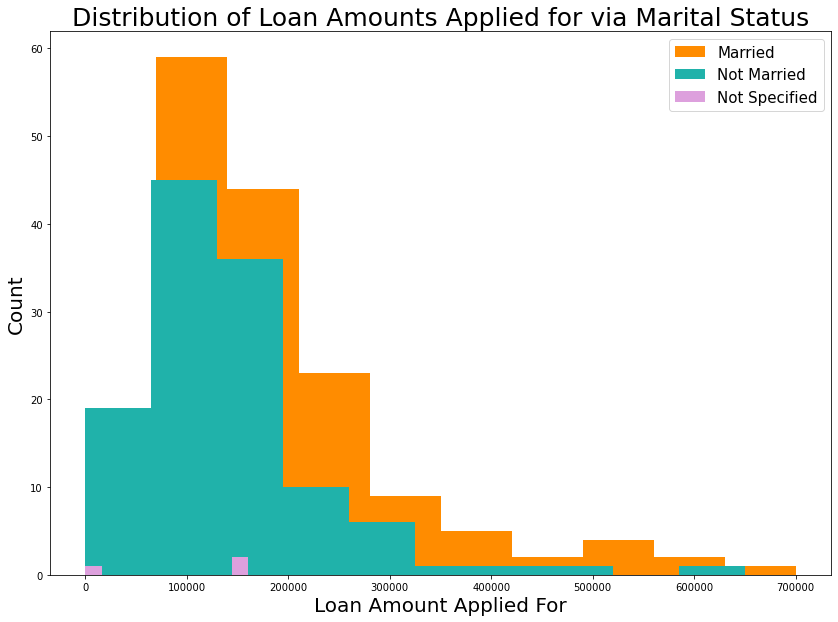

In [3]:
plot_loan_amounts_vs_marital_status(lp_df)

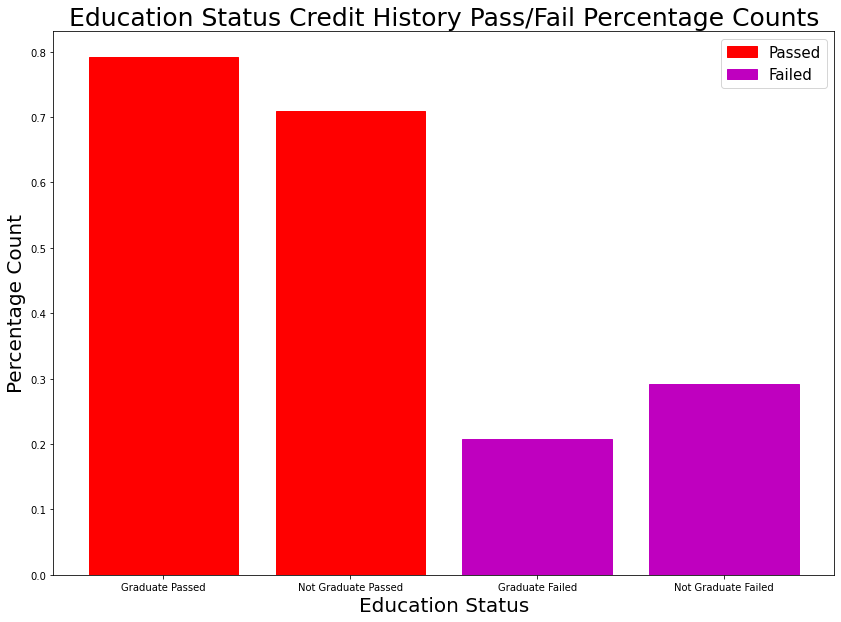

In [4]:
plot_education_status_vs_credit_history(lp_df)

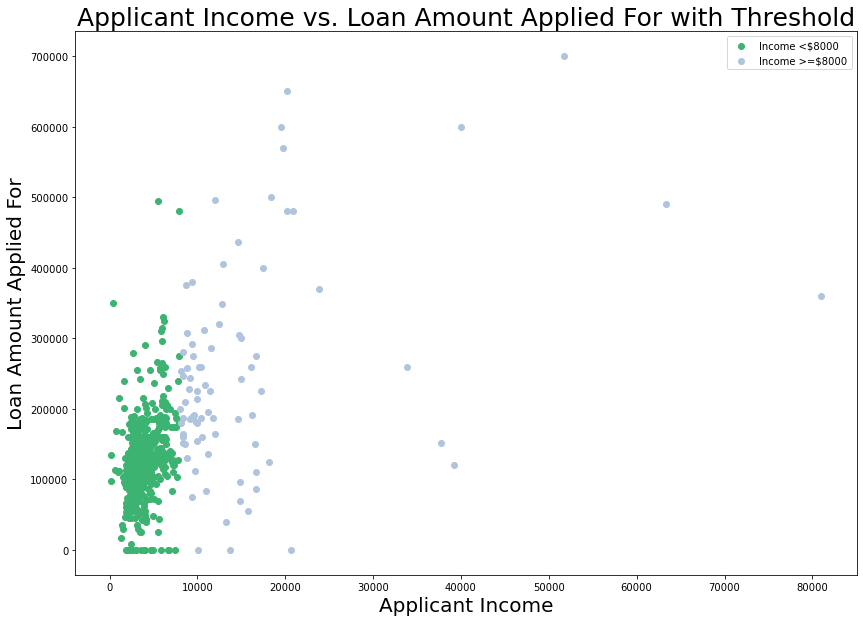

In [5]:
plot_applicant_income_vs_loan_amount_applied(lp_df)

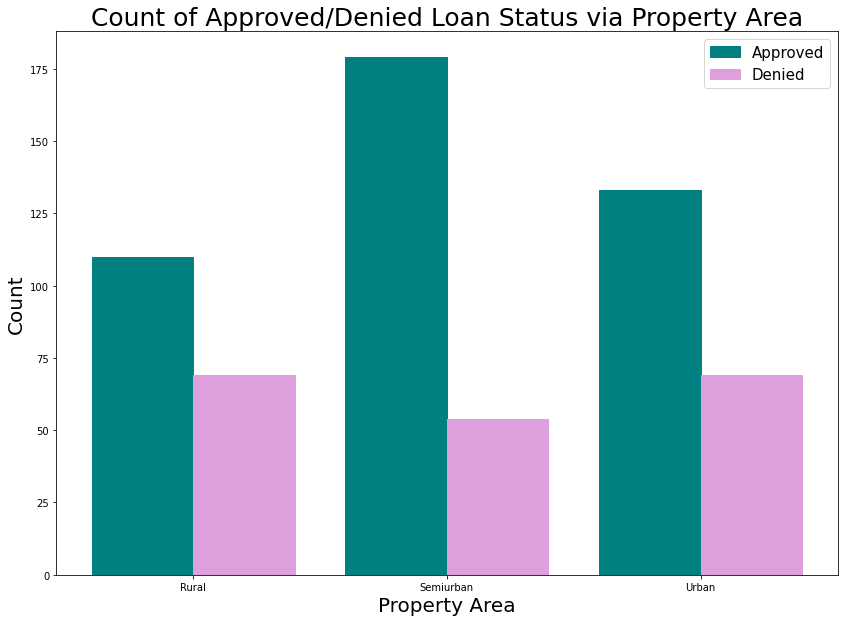

In [6]:
plot_property_area_vs_loan_status(lp_df)

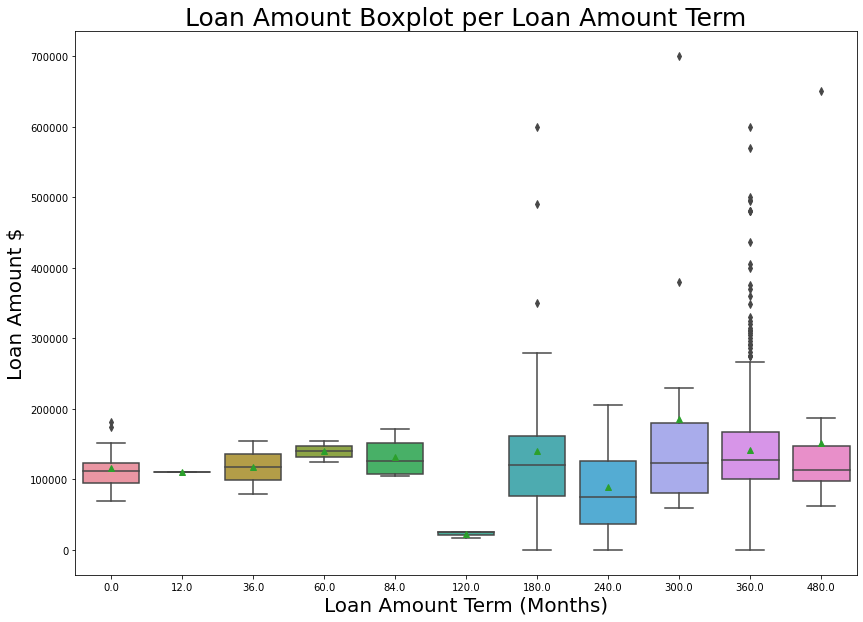

In [7]:
plot_loan_amount_vs_loan_amount_term(lp_df)

# Logistic Regression

In [8]:
# ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
X_lp_train = lp_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
Y_lp_train = lp_df[['Loan_Status']]
# Change the Y values from N : Y to 0 : 1
Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'Y', 'Loan_Status'] = 1
# Split the data 70/30 split
X_train, X_test, Y_train, Y_test = train_test_split(X_lp_train.values, Y_lp_train.values.ravel(), test_size=.3)
Y_train = Y_train.astype('int')
# Fit and transform the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

/home/ryan/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-8-f8a4b1b8542b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_lp_train.loc[Y_lp_train['Loan_Status'] == 'N', 'Loan_Status'] = 0
<ipython-input-8-f8a4b1b8542b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_lp_train.loc[Y_lp_train['Loan_Status'] == 

In [9]:
# Compute the linear regression
log_reg = LogisticRegression()
log_reg = log_reg.fit(X_train, Y_train)

In [10]:
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 3, "accuracy")
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 5, "accuracy")
print_cross_val_score_with_fold(log_reg, X_train, Y_train, 7, "accuracy")

Fold = 3
Cross Validation Score: [0.67832168 0.66433566 0.67132867]
Fold = 5
Cross Validation Score: [0.6744186  0.65116279 0.6744186  0.6744186  0.67058824]
Fold = 7
Cross Validation Score: [0.67741935 0.66129032 0.67213115 0.67213115 0.67213115 0.67213115
 0.67213115]


In [11]:
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 3)
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 5)
print_confusion_matrix_and_stats(log_reg, X_train, Y_train, 7)

Fold = 3
Confusion Matrix:
 [[  0 140]
 [  1 288]]
Precision Score: 0.6728971962616822
Recall Score: 0.9965397923875432
F1 Score: 0.803347280334728
Fold = 5
Confusion Matrix:
 [[  1 139]
 [  3 286]]
Precision Score: 0.6729411764705883
Recall Score: 0.9896193771626297
F1 Score: 0.8011204481792717
Fold = 7
Confusion Matrix:
 [[  0 140]
 [  1 288]]
Precision Score: 0.6728971962616822
Recall Score: 0.9965397923875432
F1 Score: 0.803347280334728


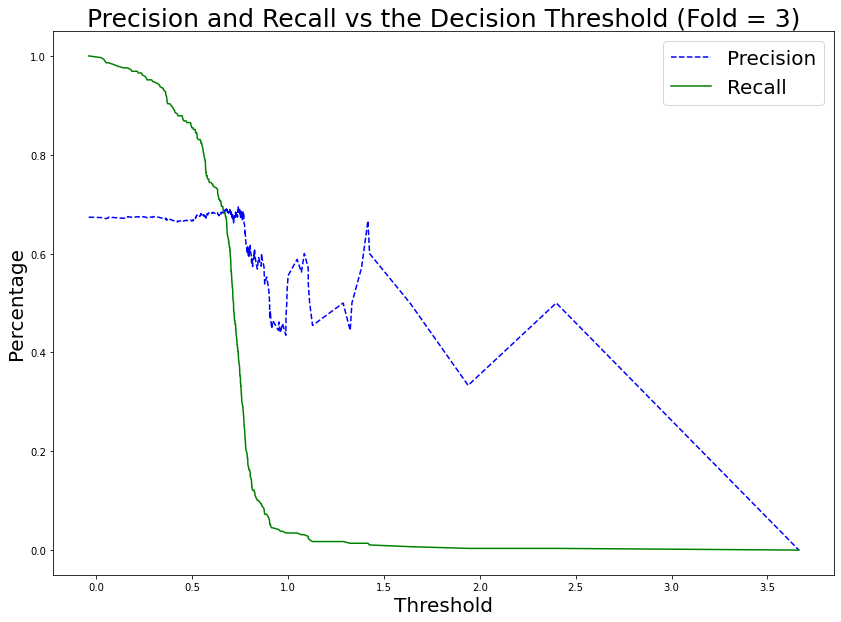

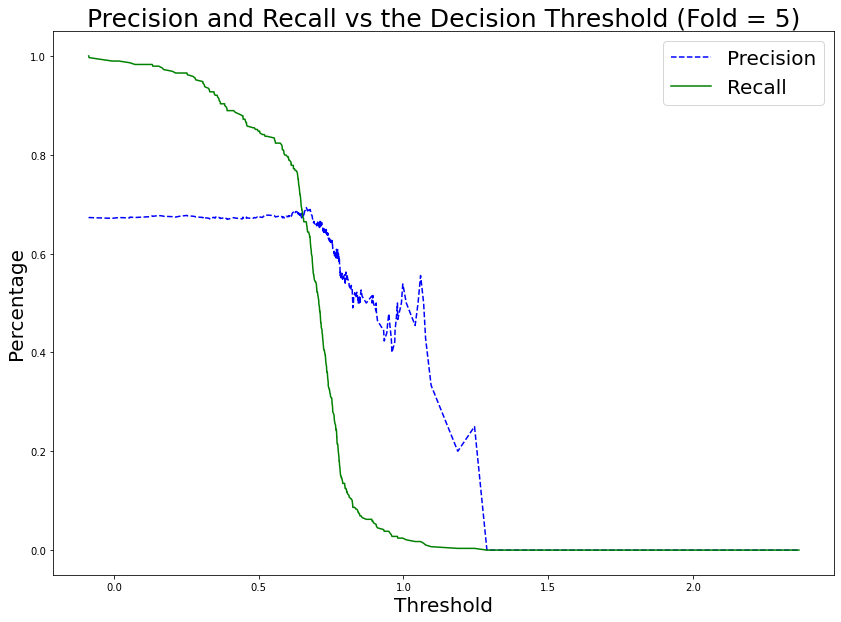

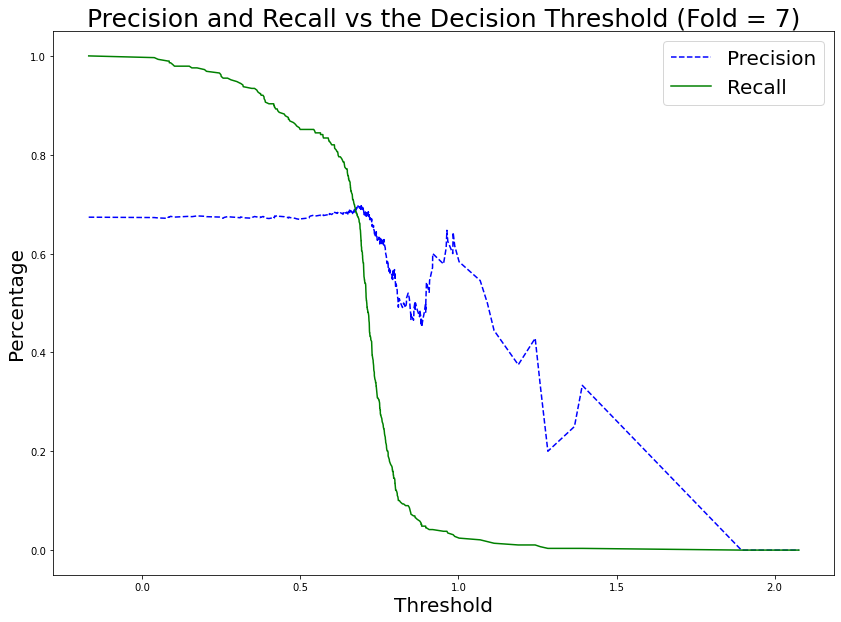

In [12]:
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 3, "decision_function")
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 5, "decision_function")
compute_scores_and_plot_precision_recall_vs_threshold(log_reg, X_train, Y_train, 7, "decision_function")

ROC AUC Score:
0.49545229856648537


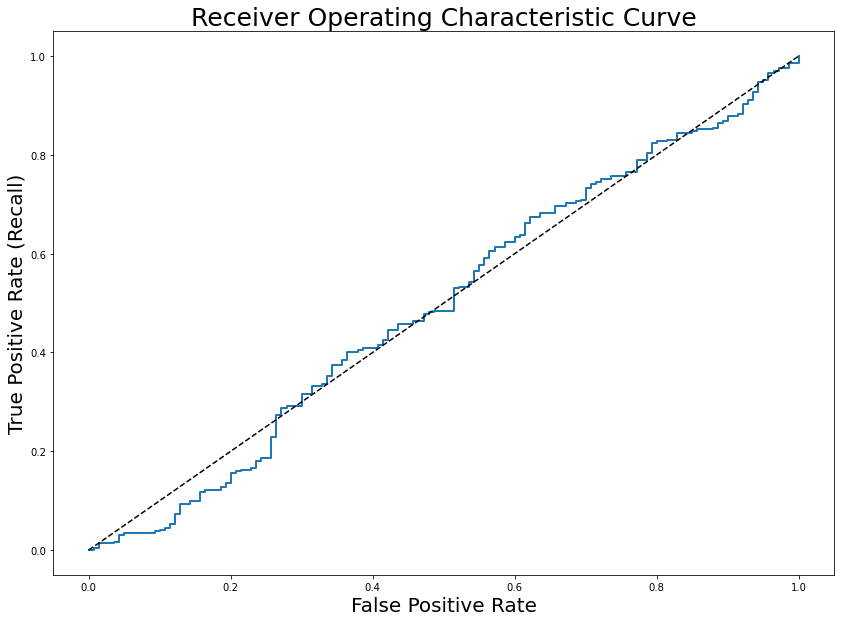

ROC AUC Score:
0.469327731092437


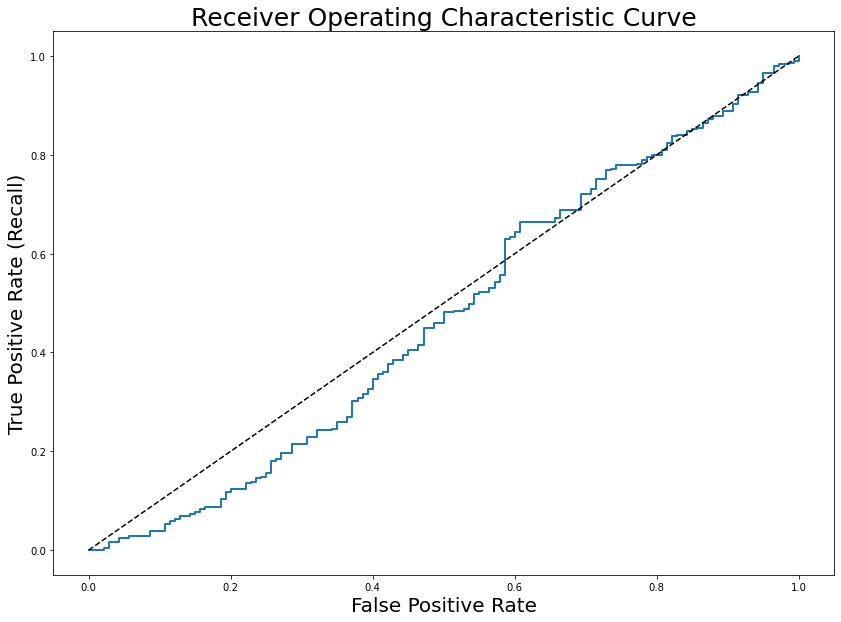

ROC AUC Score:
0.4850222441917944


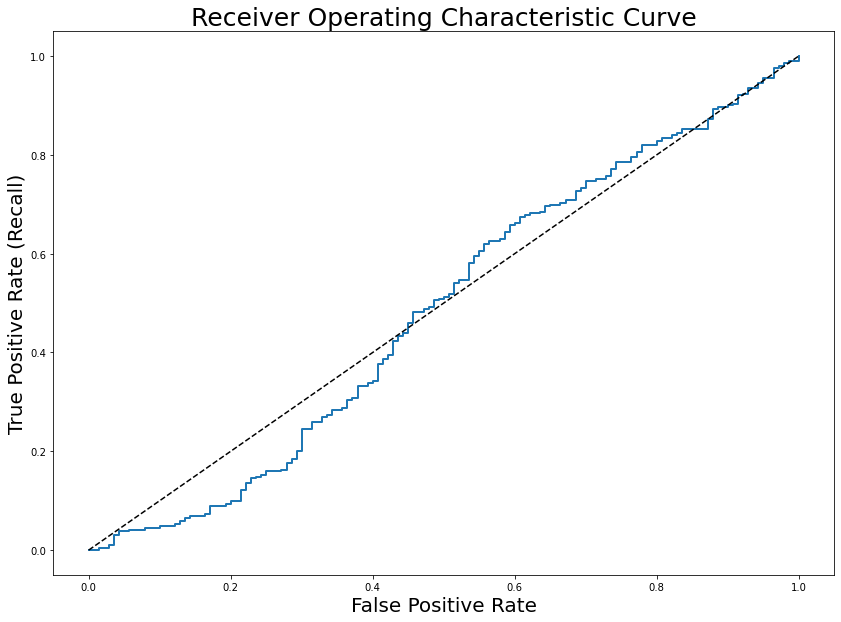

In [13]:
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 3, "decision_function")
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 5, "decision_function")
plot_roc_curve_and_print_roc_auc_score(log_reg, X_train, Y_train, 7, "decision_function")

In [14]:
y_predictions = log_reg.predict(X_train)
print_accuracy_score(Y_train, y_predictions)

Accuracy Score: 0.6736596736596736


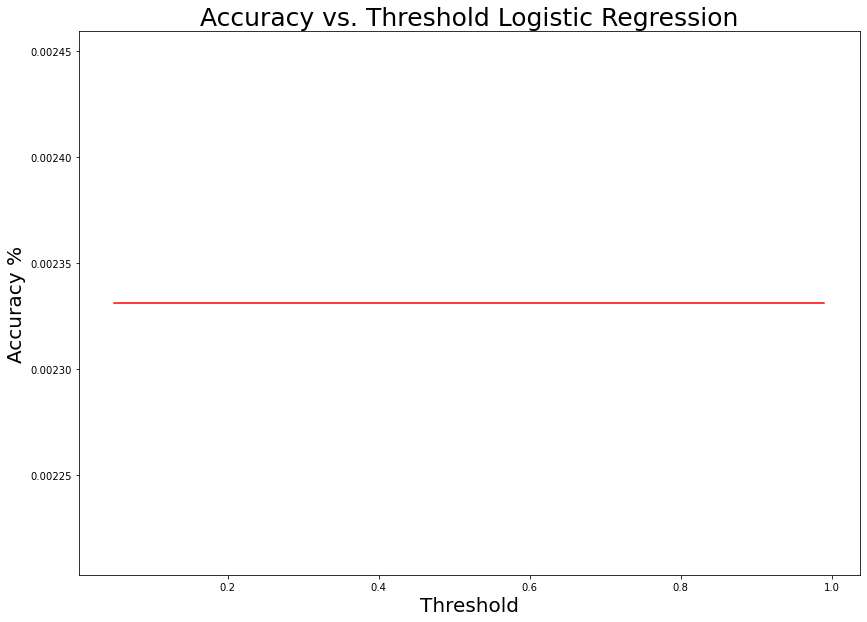

In [15]:
threshold_list, accuracy_per_threshold = get_threshold_list_and_corresponding_accuracy(log_reg, X_train, Y_train)
plot_accuracy_vs_threshold(threshold_list, accuracy_per_threshold)

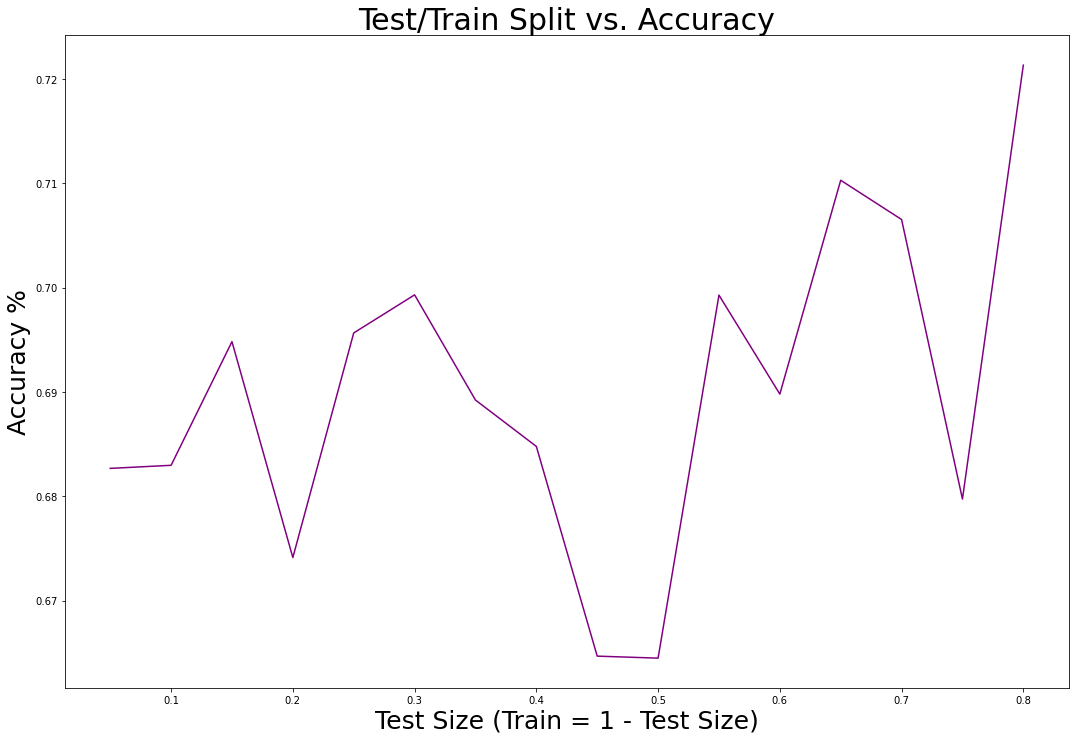

In [16]:
test_size_list, accuracy_list = compute_testtrain_split_accuracy(X_lp_train, Y_lp_train)
plot_testtrain_slit_vs_accuracy(test_size_list, accuracy_list)

# K-Nearest Neighbors